In [1]:
from ml.nn import *
from datasets.dataset import load_mnist
import matplotlib.pyplot as plt

### MNISTデータセットの表示

In [2]:
(x_train, t_train), (x_test, t_test) = load_mnist(one_hot=False)

In [3]:
img = np.reshape(x_train[1], (28, 28))

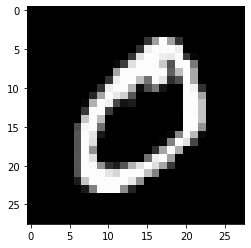

In [4]:
plt.imshow(img, cmap="gray")
plt.show()

### 3層ニューラルネットワークの実装

In [5]:
input_size = 784
output_size = 10
middle_layer_size = 50
lr = 0.001
optimizer = 'Adam'

In [6]:
model = Sequential()
model.addlayer(Linear(input_size, middle_layer_size, optimizer=optimizer, lr=lr))
model.addlayer(ReLU(optimizer=optimizer, lr=lr))
model.addlayer(Linear(middle_layer_size, middle_layer_size, optimizer=optimizer, lr=lr))
model.addlayer(ReLU(optimizer=optimizer, lr=lr))
model.addlayer(Linear(middle_layer_size, output_size, optimizer=optimizer, lr=lr))
network = Classifier(model)

In [7]:
batch_size = 100
epoch = 30
n_train = x_train.shape[0]
n_test = x_test.shape[0]

In [8]:
epoch_list = []
train_loss_list = []
train_acc_list = []
test_loss_list = []
test_acc_list = []

In [9]:
for e in range(epoch):
#     print('epoch %d'%(e+1)
    acctrain = 0
    losstrain = 0
    randinds = np.random.permutation(n_train)
    for it in range(0, n_train, batch_size):
        ind = randinds[it:it+batch_size]
        x = x_train[ind]
        t = t_train[ind]
        loss, acc = network.update(x, t)
        acctrain += int(acc * batch_size) 
        losstrain += loss
    acctrain /= (1.0 * n_train)
    losstrain /= (n_train // batch_size)
    
#     print('train, loss %f, acc %f'%(train_loss, train_acc))

    acctest = 0
    losstest = 0
    for it in range(0, n_test, batch_size):
        x = x_test[it:it+batch_size]
        t = t_test[it:it+batch_size]
        loss, acc = network.predict(x, t)
        acctest += int(acc * batch_size)
        losstest += loss
    acctest /= (1.0 * n_test)
    losstest /= (n_test // batch_size)
    print('test, loss %f, acc %f'%(losstest, acctest))
    
    epoch_list.append(e+1)
    train_loss_list.append(losstrain)
    train_acc_list.append(acctrain)
    test_loss_list.append(losstest)
    test_acc_list.append(acctest)

test, loss 0.224335, acc 0.933500
test, loss 0.186759, acc 0.944200
test, loss 0.167228, acc 0.948800
test, loss 0.149842, acc 0.954300
test, loss 0.137752, acc 0.957400
test, loss 0.127335, acc 0.961200
test, loss 0.125046, acc 0.962100
test, loss 0.114381, acc 0.965500
test, loss 0.111155, acc 0.966100
test, loss 0.110955, acc 0.966100
test, loss 0.107572, acc 0.968600
test, loss 0.103054, acc 0.968300
test, loss 0.104175, acc 0.966900
test, loss 0.102466, acc 0.969500
test, loss 0.097918, acc 0.969800
test, loss 0.098298, acc 0.969200
test, loss 0.095315, acc 0.971300
test, loss 0.096329, acc 0.970400
test, loss 0.096499, acc 0.970500
test, loss 0.094565, acc 0.971300
test, loss 0.100489, acc 0.970200
test, loss 0.095331, acc 0.971400
test, loss 0.095352, acc 0.972500
test, loss 0.094254, acc 0.972700
test, loss 0.099493, acc 0.970400
test, loss 0.097102, acc 0.971900
test, loss 0.096848, acc 0.973300
test, loss 0.096201, acc 0.973000
test, loss 0.099815, acc 0.971500
test, loss 0.1

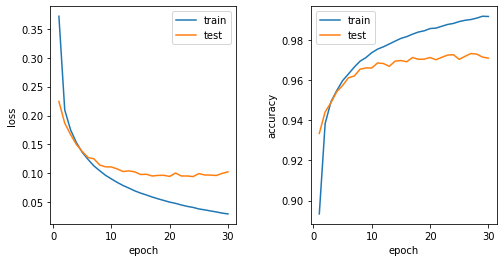

In [10]:
fig = plt.figure(figsize=(8, 4))
loss_graph = fig.add_subplot(1, 2, 1)
acc_graph = fig.add_subplot(1, 2, 2)
loss_graph.set_xlabel('epoch')
loss_graph.set_ylabel('loss')
acc_graph.set_xlabel('epoch')
acc_graph.set_ylabel('accuracy')

loss_graph.plot(epoch_list, train_loss_list, label='train')
loss_graph.plot(epoch_list, test_loss_list, label='test')
loss_graph.legend()

acc_graph.plot(epoch_list, train_acc_list, label='train')
acc_graph.plot(epoch_list, test_acc_list, label='test')
acc_graph.legend()

plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.savefig('nn_basic')